# 1. Giới thiệu
## 1.1. Cài đặt

In [1]:
install.packages("ggplot2")

Installing package into ‘/home/manhcuong/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)



## 1.2. Gọi thư viện

In [2]:
library('ggplot2')

# 2. Thành phần trên biểu đồ
* Dữ liệu, thuộc tính
* Loại biểu đồ
* Hình thức (trục tọa độ, nhãn, tiêu đề, theme)

## 2.1. Dữ liệu thuộc tính

In [3]:
plot = ggplot(data = mtcars, aes(x = hp,
                                 y = mpg,
                                 fill = carb,
                                 color = carb,
                                 lwd = 1))

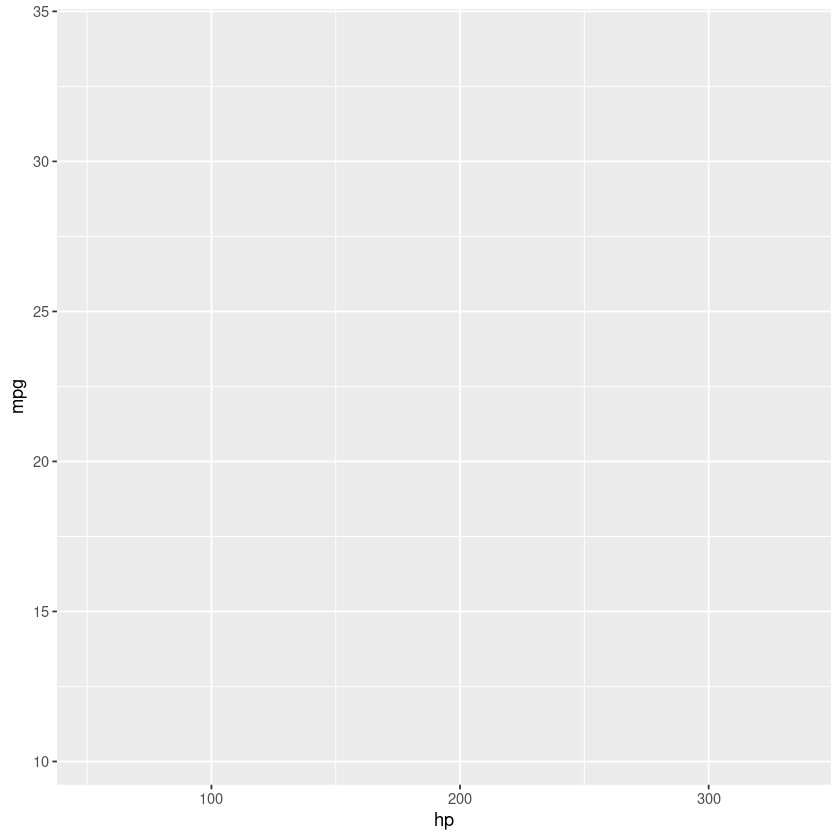

In [4]:
plot

## 2.2. Loại biểu đồ
* `geom_point()`
* `geom_histogram()`
* `geo_bar()`
* `geo_histogram()`

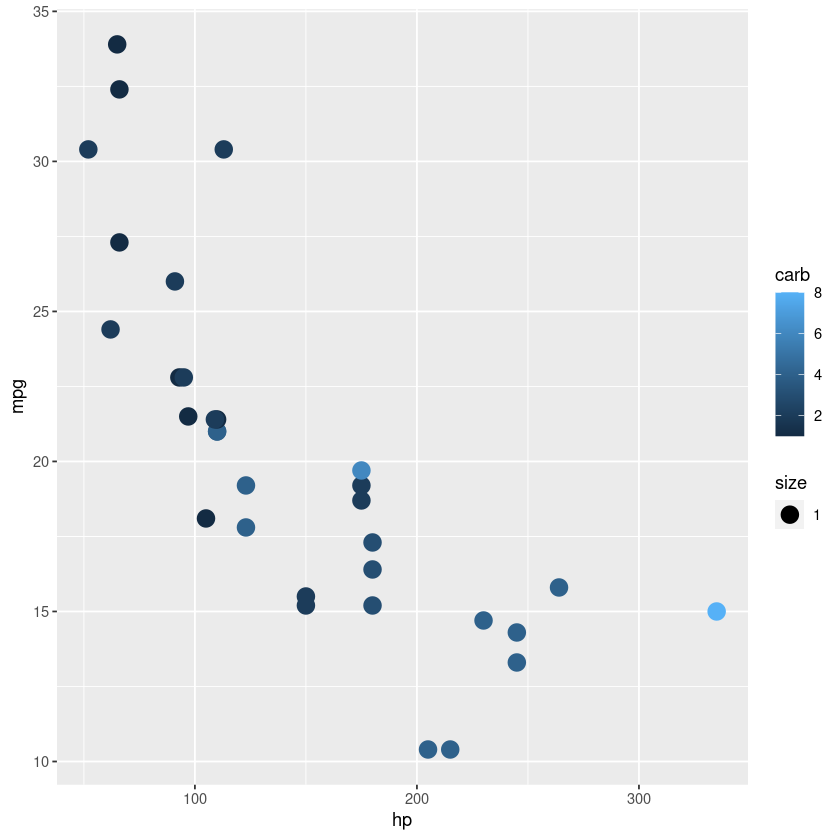

In [5]:
plot = plot + geom_point()
plot

## 2.3. Hình thức
### 2.3.1. Trục
* Phân loại: `scale_y_discrete(name=<tên trục>, limits=<vector chứa các giá trị phân loại>)`
* Liên tục: `scale_x_continuous(name=<tên trục>, breaks = seq(from=<>, to=<>, by=<>), limits = c(<>, <>))`

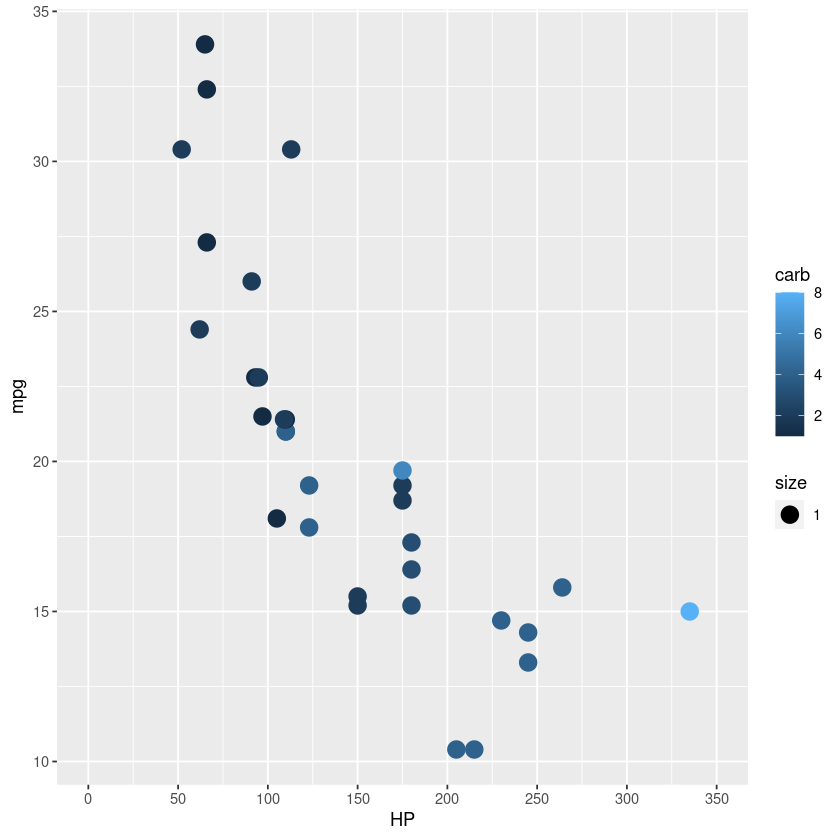

In [8]:
plot = ggplot(data = mtcars, aes(x = hp,
                                 y = mpg,
                                 fill = carb,
                                 color = carb,
                                 lwd = 1))
plot = plot + geom_point()
plot = plot + scale_x_continuous('HP', breaks = seq(0, 350, 50), limits = c(0, 350))
plot

### 2.3.2. Nhãn, tiêu đề
* Nhãn cho trục trung và hoành: `xlab(<tên>) + ylab(<tên>)`
* Tiêu đề: `ggtitle(<tên>)`

### 2.3.3. Theme

In [7]:
install.packages('ggthemes')

Installing package into ‘/home/manhcuong/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)



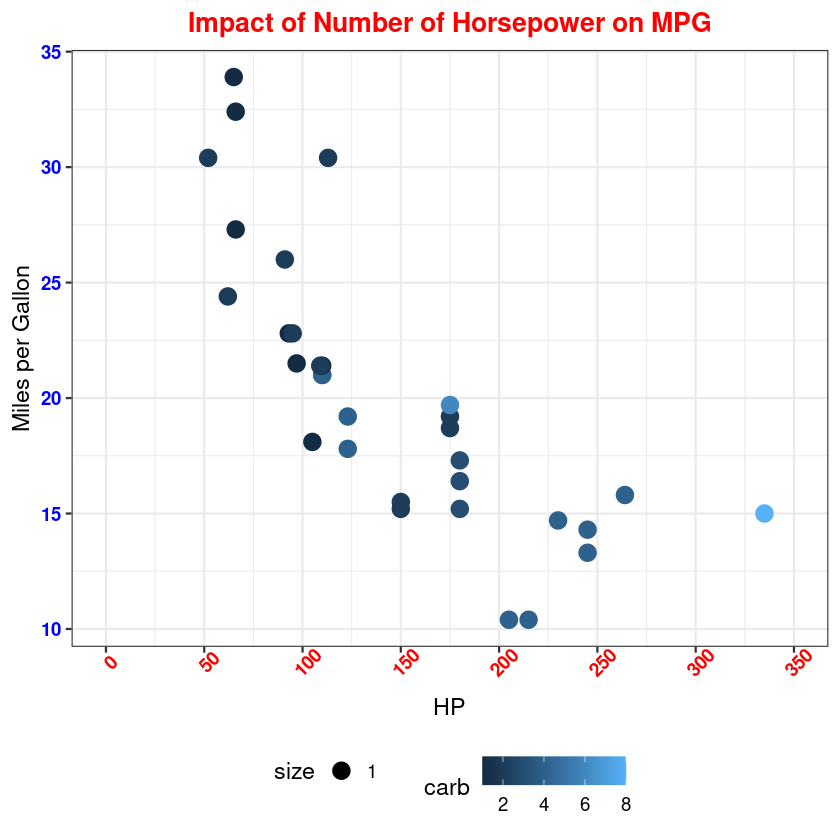

In [12]:
plot = ggplot(data = mtcars, aes(x = hp,
                                 y = mpg,
                                 fill = carb,
                                 color = carb,
                                 lwd = 1))
plot = plot + geom_point()
plot = plot + scale_x_continuous('HP', breaks = seq(0, 350, 50), limits = c(0, 350))
plot = plot + ylab("Miles per Gallon")
plot = plot + xlab('No. of Horsepower')
plot = plot + ggtitle("Impact of Number of Horsepower on MPG")
plot = plot + theme_bw(base_size = 14)
plot = plot + theme(legend.position = 'bottom',
                    plot.title = element_text(color = 'red', size = 16, face = 'bold', hjust = 0.5),
                    axis.text.x = element_text(face = 'bold', color = 'red', angle = 45),
                    axis.text.y = element_text(face = 'bold', color = 'blue'))
plot

### 2.3.4. Marginal histogram
* Thêm phân phối cho từng scale của dữ liệu bằng histogram

In [13]:
install.packages('ggExtra')

Installing package into ‘/home/manhcuong/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)



In [14]:
library('ggExtra')

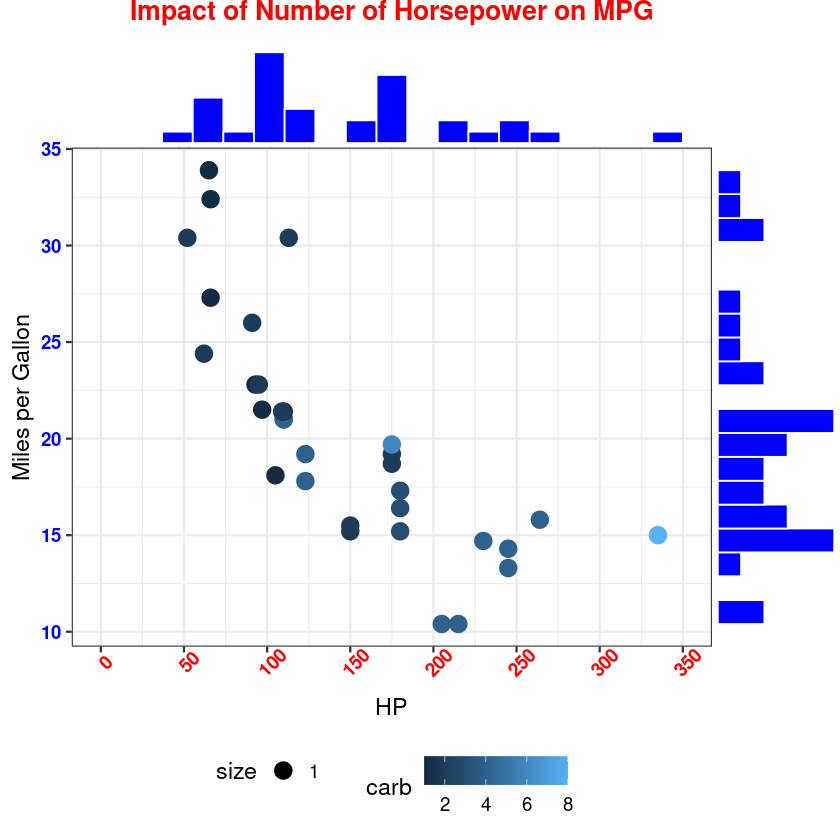

In [16]:
plot = ggplot(data = mtcars, aes(x = hp,
                                 y = mpg,
                                 fill = carb,
                                 color = carb,
                                 lwd = 1))
plot = plot + geom_point()
plot = plot + scale_x_continuous('HP', breaks = seq(0, 350, 50), limits = c(0, 350))
plot = plot + ylab("Miles per Gallon")
plot = plot + xlab('No. of Horsepower')
plot = plot + ggtitle("Impact of Number of Horsepower on MPG")
plot = plot + theme_bw(base_size = 14)
plot = plot + theme(legend.position = 'bottom',
                    plot.title = element_text(color = 'red', size = 16, face = 'bold', hjust = 0.5),
                    axis.text.x = element_text(face = 'bold', color = 'red', angle = 45),
                    axis.text.y = element_text(face = 'bold', color = 'blue'))

# new
ggMarginal(plot, type = 'histogram', col = 'white', fill = 'blue', bins = 20)

# 3. Biểu đồ
## 3.1. Histogram - `geom_histogram()`
### 3.1.1. Dạng chuẩn 

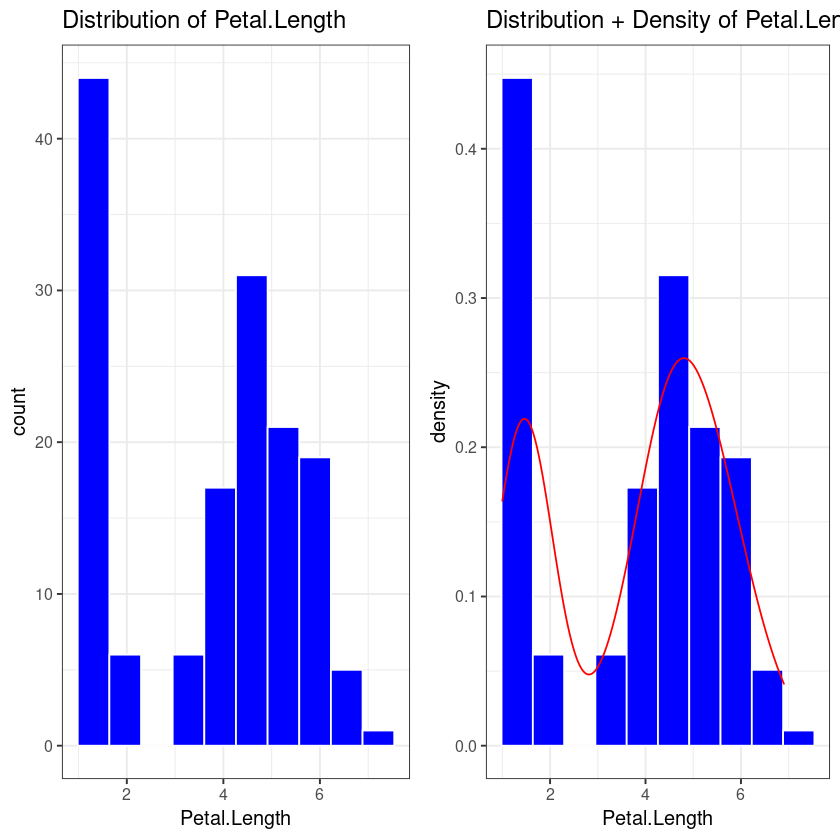

In [22]:
library('ggplot2')
library('gridExtra')

p = ggplot(iris, aes(Petal.Length))
p1 = p + geom_histogram(bins = 10, color = 'white', fill = 'blue') +
     ggtitle("Distribution of Petal.Length") +
     theme_bw(base_size = 12)

p2 = p + geom_histogram(aes(y=..density..), bins = 10, color = 'white', fill = 'blue') +
     geom_density(col = 'red') + 
     ggtitle("Distribution + Density of Petal.Length") +
     theme_bw(base_size = 12)

grid.arrange(p1, p2, ncol = 2)

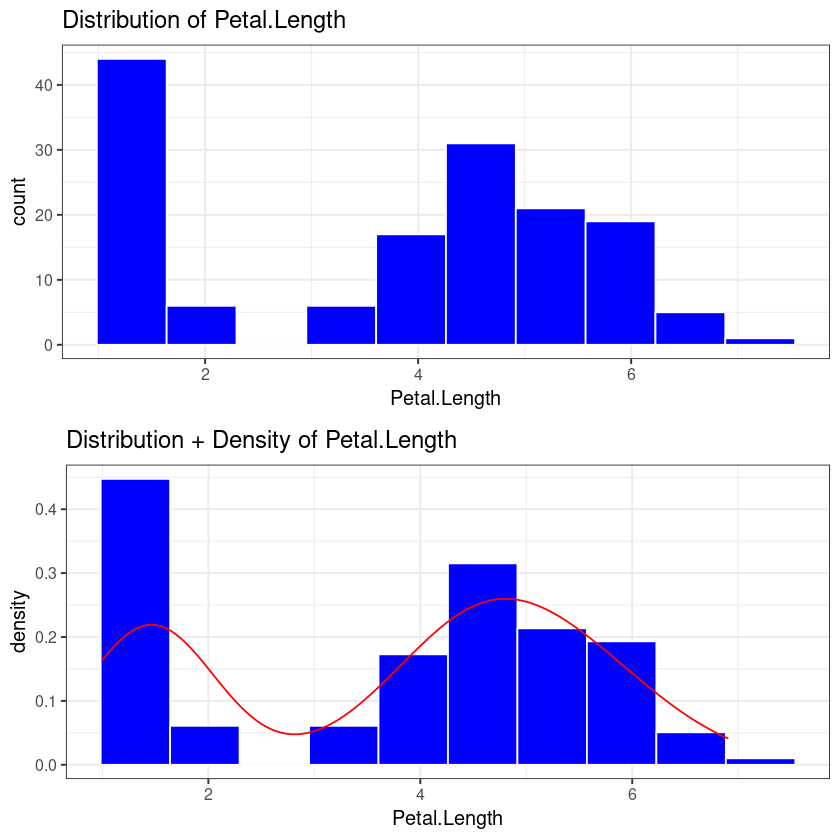

In [25]:
grid.arrange(p1, p2, nrow = 2)

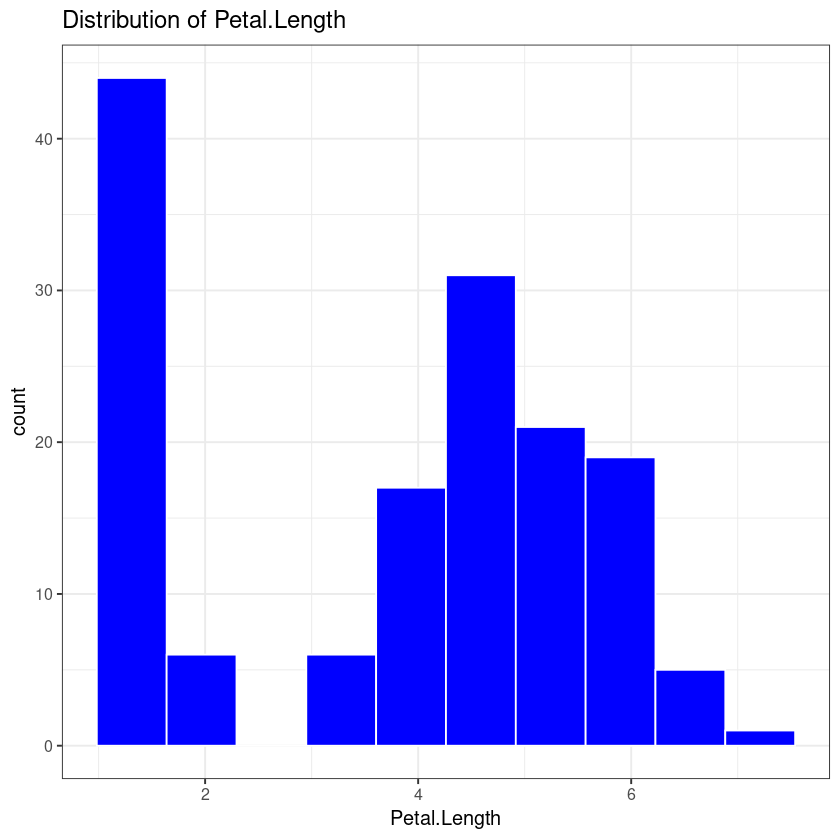

In [23]:
p1

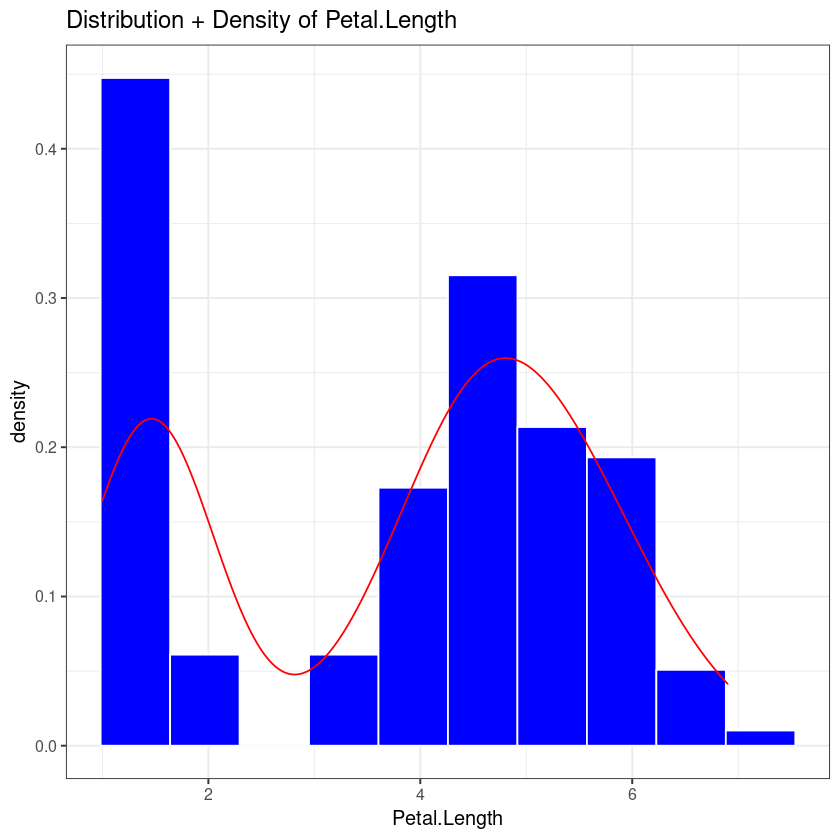

In [24]:
p2

### 3.1.2. Dạng nhóm

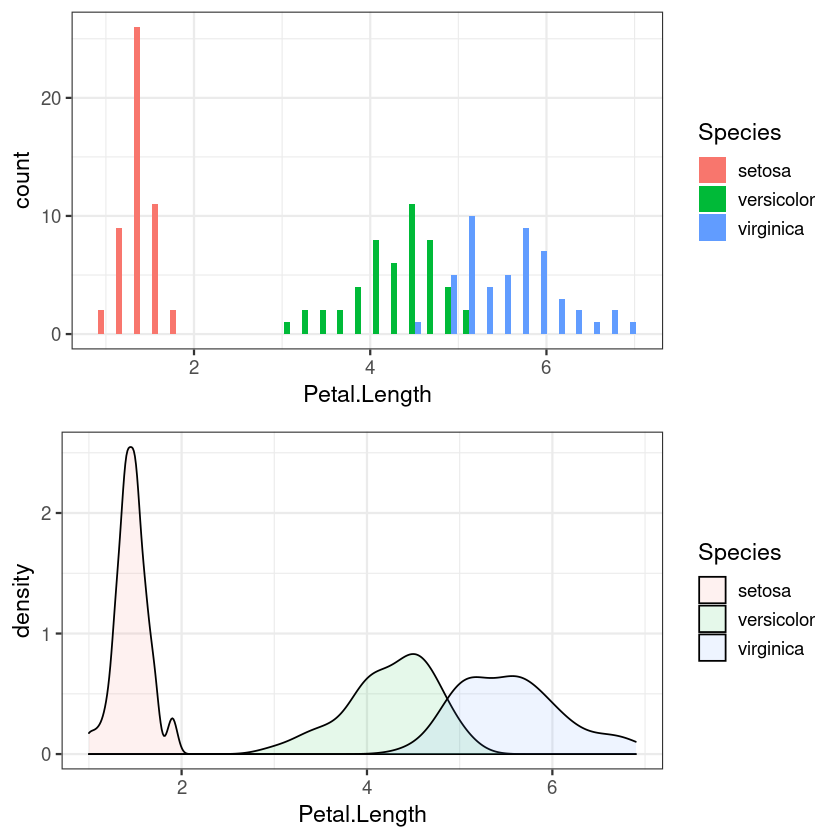

In [27]:
p = ggplot(iris, aes(x = Petal.Length, fill = Species))

p1 = p + geom_histogram(position = 'dodge', bins = 30) +
     theme_bw(base_size = 14)

p2 = p +
     geom_density(alpha = 0.1) + theme_bw(base_size = 14)

grid.arrange(p1, p2, nrow = 2)

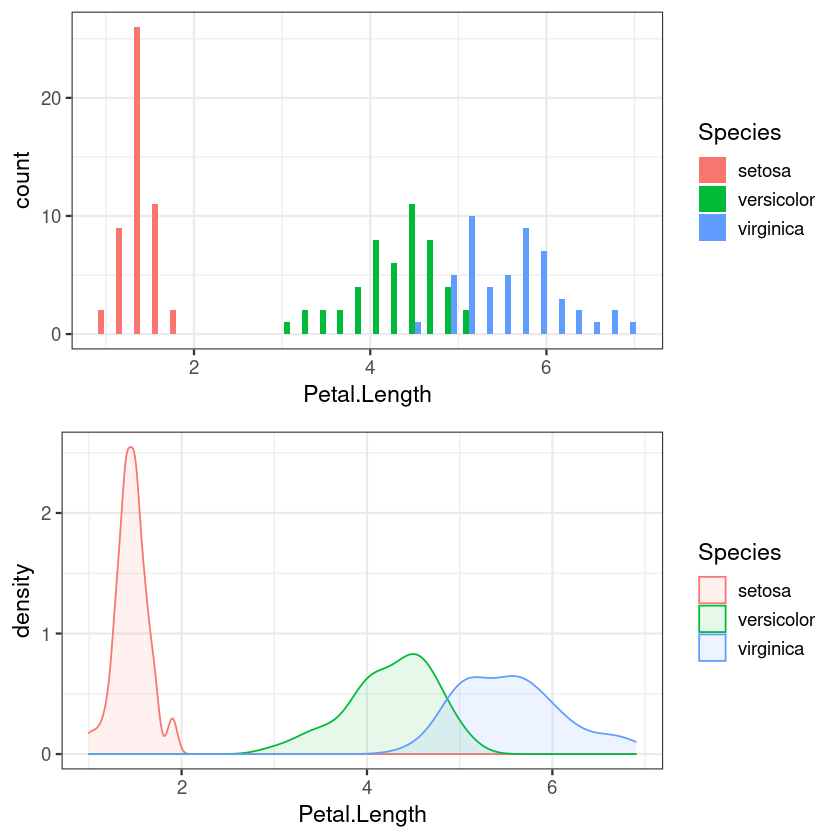

In [28]:
p = ggplot(iris, aes(x = Petal.Length, fill = Species))

p1 = p + geom_histogram(position = 'dodge', bins = 30) +
     theme_bw(base_size = 14)

p2 = ggplot(iris, aes(x = Petal.Length, fill = Species, color = Species)) +
     geom_density(alpha = 0.1) + theme_bw(base_size = 14)

grid.arrange(p1, p2, nrow = 2)

## 3.2. Bar plot - `geom_bar()`
### 3.2.1. Chuẩn

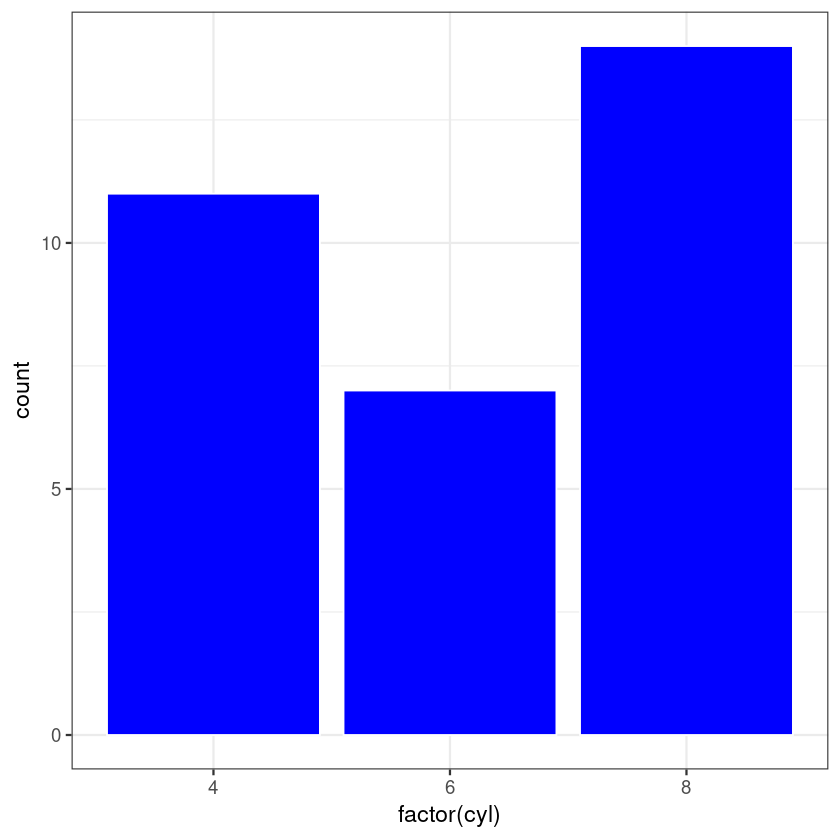

In [29]:
cp = ggplot(mtcars, aes(x = factor(cyl))) +
     geom_bar(color = 'white', fill = 'blue') +
     theme_bw(base_size = 14)

cp

### 3.2.2. Phân nhóm

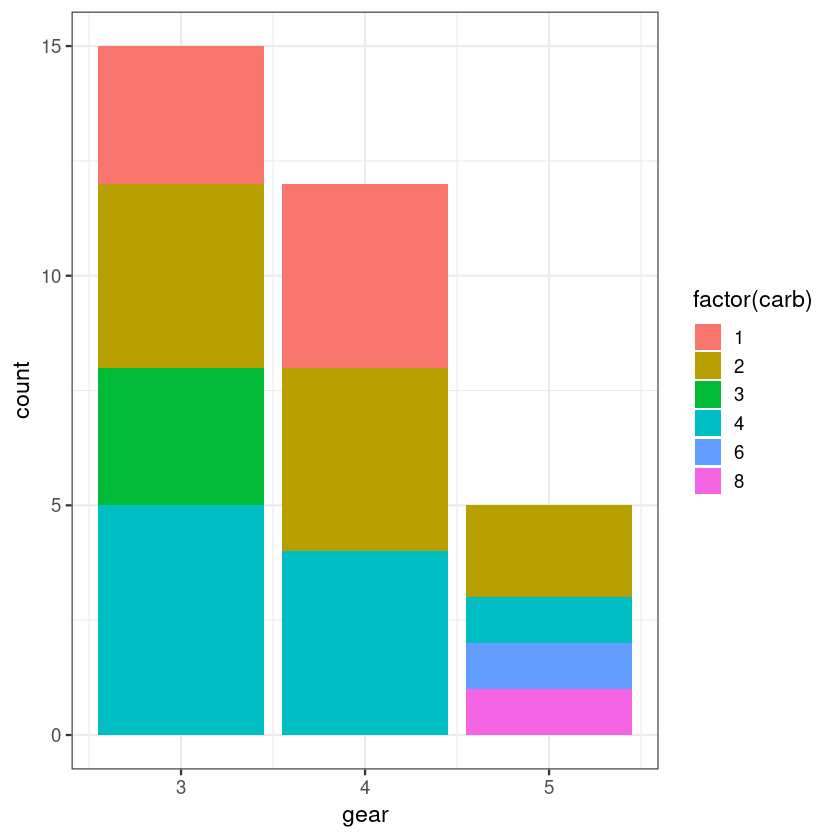

In [31]:
cp = ggplot(mtcars, aes(x = gear, fill = factor(carb))) +
     geom_bar() +
     theme_bw(base_size = 14)

cp

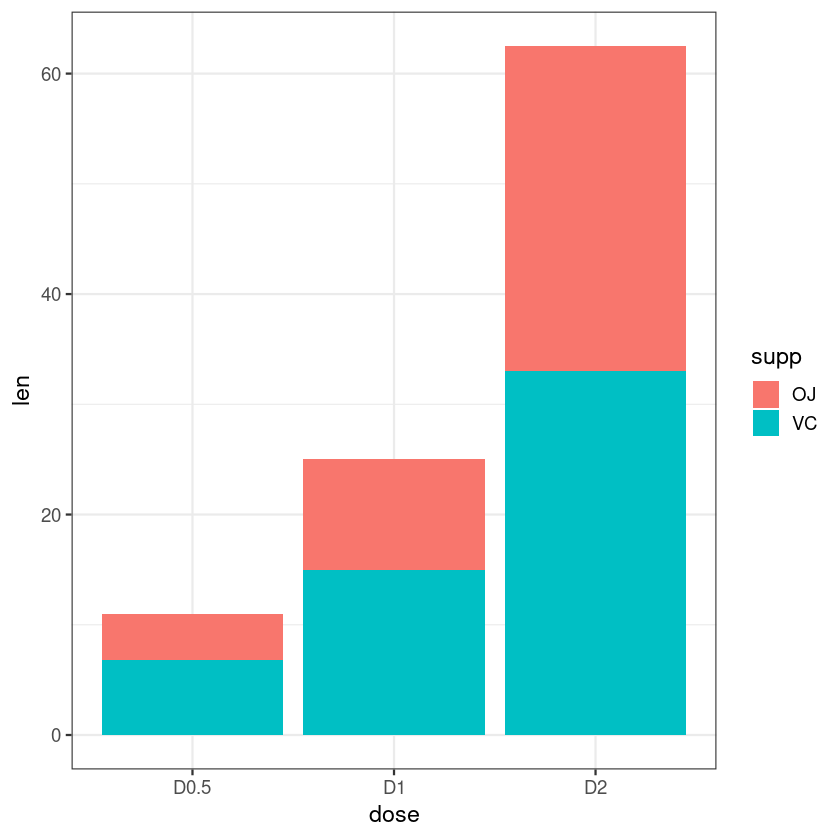

In [36]:
df2 = data.frame(
    'supp' = c('VC', 'VC', 'VC', 'OJ', 'OJ', 'OJ'),
    'dose' = c('D0.5', 'D1', 'D2', 'D0.5', 'D1', 'D2'),
    'len' = c(6.8, 15.0, 33.0, 4.2, 10.0, 29.5)
)

ggplot(data =df2, aes(x=dose, y=len, fill=supp)) +
    geom_bar(stat = 'identity') + theme_bw(base_size = 14)

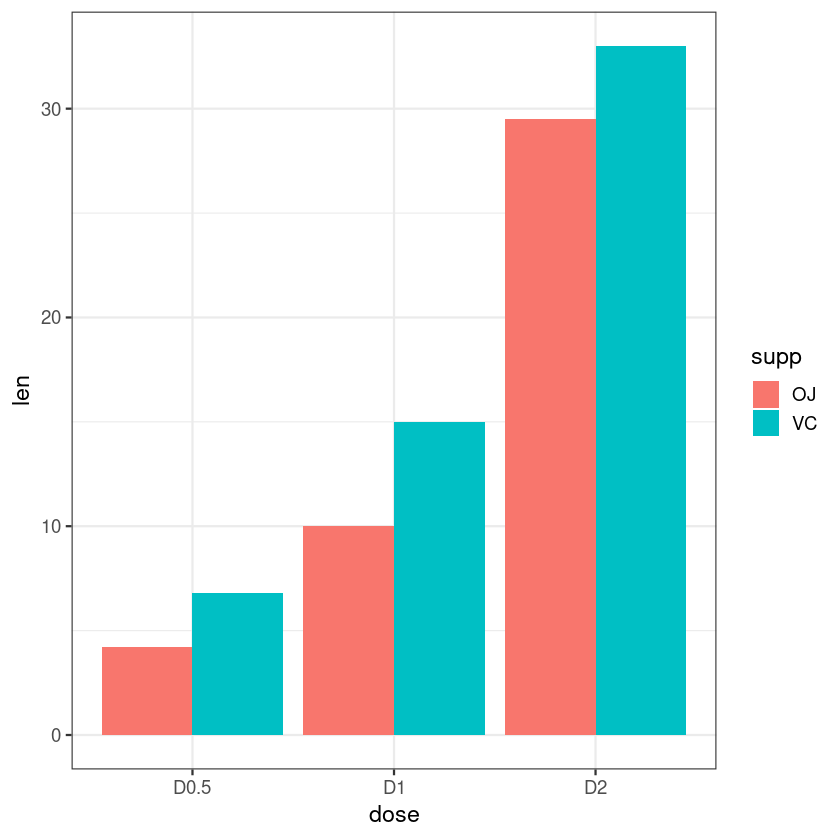

In [38]:
df2 = data.frame(
    'supp' = c('VC', 'VC', 'VC', 'OJ', 'OJ', 'OJ'),
    'dose' = c('D0.5', 'D1', 'D2', 'D0.5', 'D1', 'D2'),
    'len' = c(6.8, 15.0, 33.0, 4.2, 10.0, 29.5)
)

ggplot(data =df2, aes(x=dose, y=len, fill=supp)) +
    geom_bar(stat = 'identity', position='dodge') + theme_bw(base_size = 14)

## 3.3. Boxplot - `geom_boxplot()`

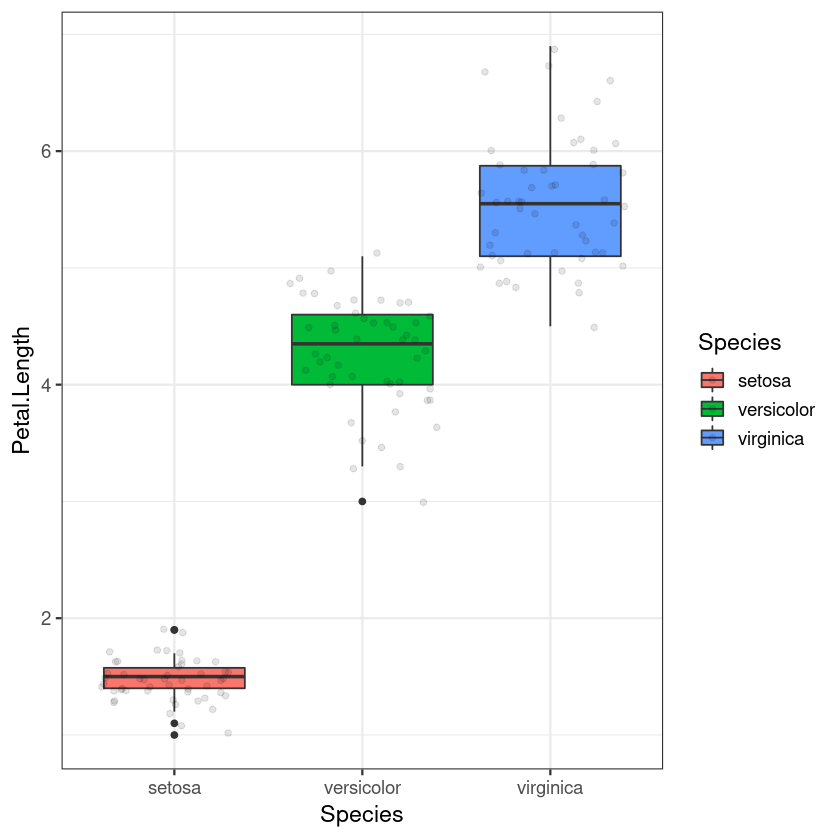

In [39]:
ggplot(data = iris, aes(x = Species, y = Petal.Length, fill = Species)) +
    geom_boxplot() + geom_jitter(alpha = 0.1) + theme_bw(base_size = 14)

## 3.4. Scatter plot - `geom_point()`

`geom_smooth()` using formula 'y ~ x'



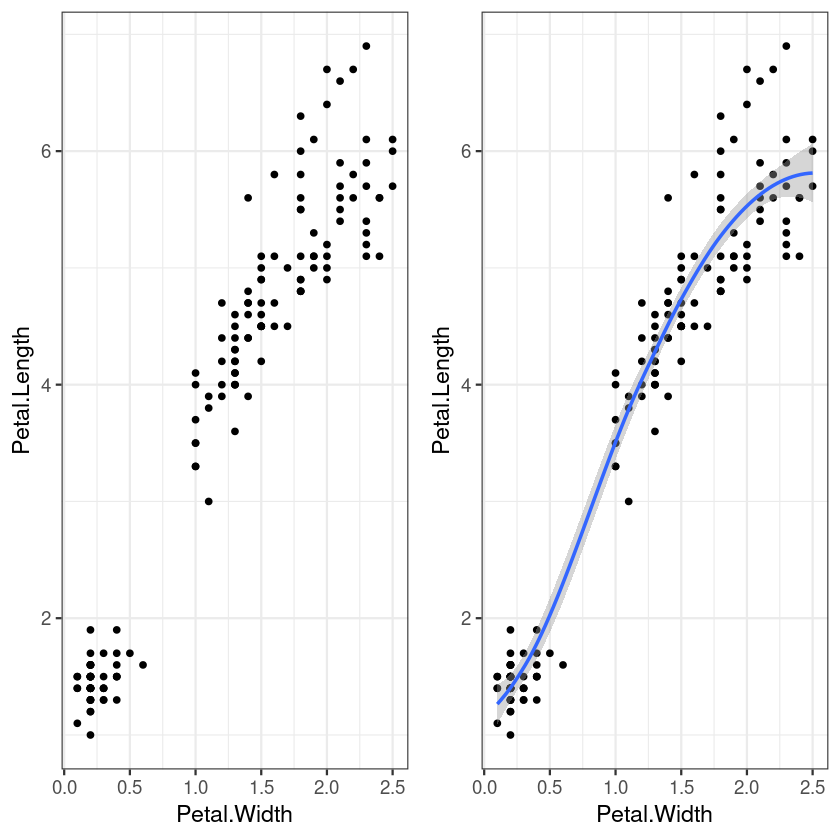

In [40]:
library('gridExtra')

ip = ggplot(data = iris, aes(x = Petal.Width, y = Petal.Length))

ip1 = ip + geom_point() + theme_bw(base_size=14)
ip2 = ip + geom_point() + geom_smooth(method = 'loess') + # vẽ đường phi tuyến
    theme_bw(base_size = 14) 

grid.arrange(ip1, ip2, ncol=2)

`geom_smooth()` using formula 'y ~ x'



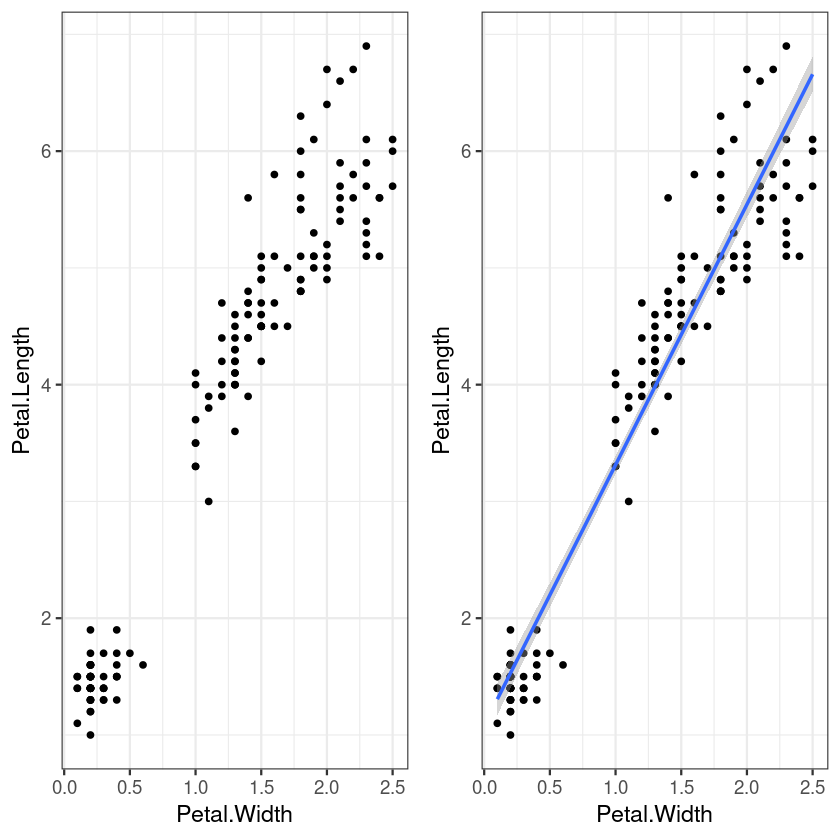

In [42]:
library('gridExtra')

ip = ggplot(data = iris, aes(x = Petal.Width, y = Petal.Length))

ip1 = ip + geom_point() + theme_bw(base_size=14)
ip2 = ip + geom_point() + geom_smooth(method = 'lm') +  # vẽ đường tuyến tính
    theme_bw(base_size = 14)

grid.arrange(ip1, ip2, ncol=2)

`geom_smooth()` using formula 'y ~ x'



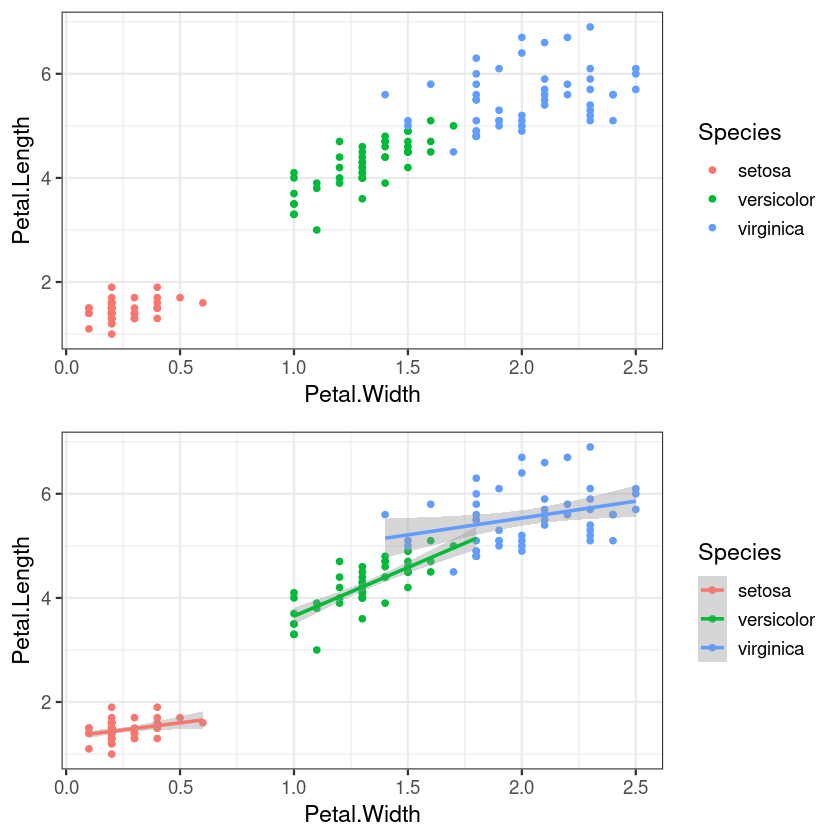

In [44]:
ip = ggplot(data = iris, aes(x = Petal.Width, y = Petal.Length, col = Species))

ip1 = ip + geom_point() + theme_bw(base_size = 14)
ip2 = ip + geom_point() + geom_smooth(method = 'lm') + theme_bw(base_size = 14)

grid.arrange(ip1, ip2, nrow = 2)

## 3.5. Tương quan đa biến

In [47]:
install.packages('GGally')
library('GGally')

Installing package into ‘/home/manhcuong/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)



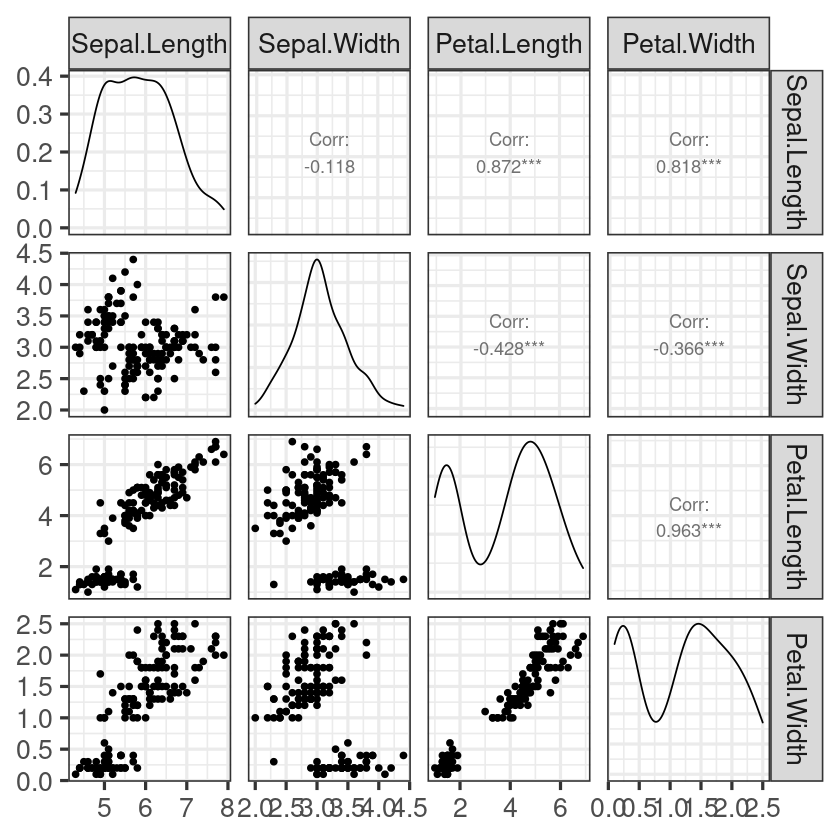

In [50]:
ci = colnames(iris)
vars = iris[, ci[-5]]

ggpairs(data = vars) + theme_bw(base_size=20) 

### 3.5.1. Heatmap - Correlation

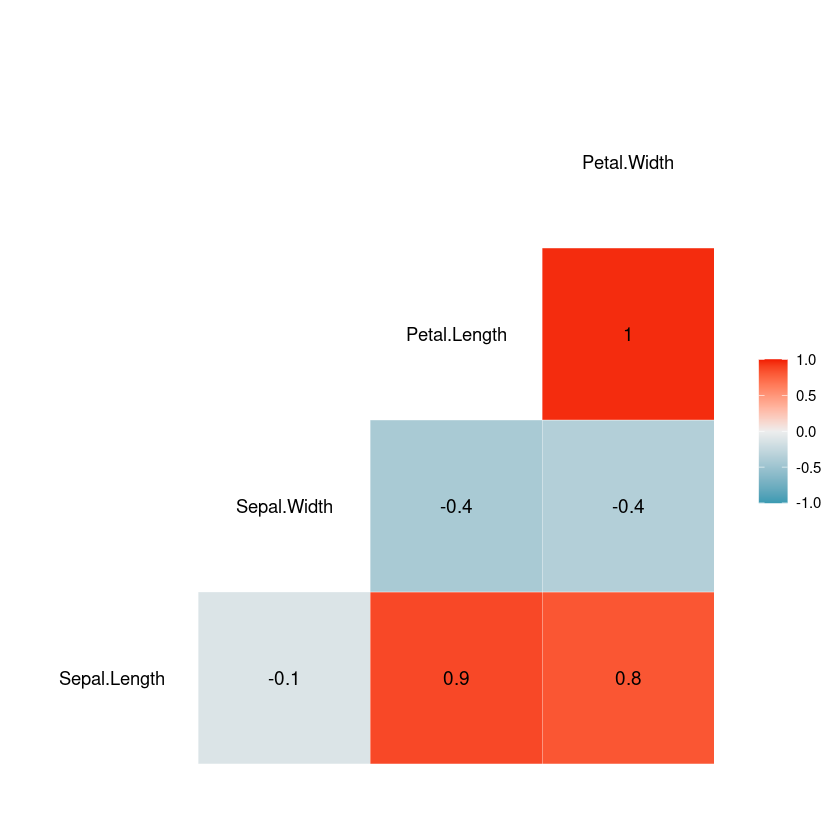

In [51]:
iris_sub = iris[, -c(5)]
ggcorr(data = iris_sub, label = TRUE)